# DeepSqueak Analysis:
This notebook imports the USV call spreadsheets and converts them into pandas dataframes, stitches the dataframes together, adds sex and stimulation columns, removes unnecessary columns, then exports one final spreadsheet. <br>*Some errors can occur related to the predetermined attribute names. Calling dataframe.column_name won't work if the name contains parentheses. Also, the forward slash (/) in 'Mean Power (dB/Hz) was problematic because python thinks this is a directory name. Use backslash instead.*

### Imports, settings, and functions

In [1]:
## Install the neccessary imports and check working directory

import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pylab       # this import probably won't be used
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
print(os.getcwd())

/Users/zacharygutierrez/A_Drive/STOWERS


In [3]:
## Increase the width of all cells for just this notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
## Function for combining spreadsheets within the same directory
## NOTE: Arguments must match the directory (e.g. /Male/1Hz -> 'male', '1')

def merge_sheets(directory, sex, stimulation_freq):
    """Combines all spreadsheets within the given
       directory and returns them as a dataframe."""
    
    path1 = directory
    path2 = sex.capitalize() + '/'
    path3 = stimulation_freq + 'Hz'
    directory = path1+path2+path3
    os.chdir(directory)
    #print(directory)
    
    df = pd.DataFrame() # start with an empty df, then append
    for filename in os.listdir(directory):    
        if filename.endswith(".xlsx"):
            sheet = pd.read_excel(filename)
            df = df.append(sheet, ignore_index=True)
        else:
            continue
            
    df['Sex'] = sex
    df['Stimulation'] = stimulation_freq
    return df

In [5]:
## Function to create a list, ensure sex and atribute are strings

def get_list(sex, attribute):
    """Create a list with five mean values for every
       stimulation freq per sex/attribute"""
    
    stim_list = ['1','5','10','25','50']
    mean_list = []
    
    for val in stim_list:
        mean = np.mean(total_calls[(total_calls.Sex == sex) & (total_calls.Stimulation == val)][attribute])
        mean_list.append(mean)
    
    return mean_list

In [6]:
## Function for creating bar graphs out of call data
## NOTE: First two argument lists should have five (5) elements
##       and the third arg should be a string

## TODO: add in std parameter
def plot_list(maleList, femaleList, attribute):
    """Plots a bar chart comparing elements at 
       the same index within each list."""
    
    fig, ax = plt.subplots()
    n_groups = 5
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, maleList, bar_width,
                    alpha=opacity, color='b',
                    #yerr=std_male, 
                    error_kw=error_config)#, label='male')

    rects2 = ax.bar(index + bar_width, femaleList, bar_width,
                    alpha=opacity, color='r',
                    #yerr=std_female,
                    error_kw=error_config)#, label='female')

    ax.set_xlabel('Stimulation')
    ax.set_ylabel(attribute)
    ax.set_title('Average ' + attribute)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(('1Hz', '5Hz', '10Hz', '25Hz', '50Hz'))
    
   # pylab.legend(loc='lower left')   # i was trying this line to move the legend
    os.chdir('/Users/zacharygutierrez/Desktop')
    #pylab.savefig(attribute + '.png')
   # ax.legend()

    fig.tight_layout()
    plt.show()

In [7]:
## Function for creating bar graphs out of call data
## NOTE: First two argument lists should have five (5) elements
##       and the third arg should be a string

## TODO: add in std parameter
def scatter_list(list_1, list_2, list_3, attribute):
    """Scatters the data comparing elements at 
       the same index within each list."""
    
    fig, ax = plt.subplots()
    n_groups = 5
    index = np.arange(n_groups)
    bar_width = 0.15
    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    spots1 = ax.bar(index, list_1,
                    alpha=opacity, color='b')

    spots2 = ax.bar(index + bar_width, list_2,
                    alpha=opacity, color='r')
                    
    spots3 = ax.bar(index + bar_width + bar_width, list_3,
                    alpha=opacity, color='g')
    
    ax.set_xlabel('Stimulation')
    ax.set_ylabel(attribute)
    ax.set_title('Average ' + attribute)
    ax.set_xticks(index + bar_width / 3)
    ax.set_xticklabels(('1Hz', '5Hz', '10Hz', '25Hz', '50Hz'))
    
   # pylab.legend(loc='lower left')   # i was trying this line to move the legend
    os.chdir('/Users/zacharygutierrez/Desktop')
    #pylab.savefig(attribute + '.png')
   # ax.legend()

    fig.tight_layout()
    plt.show()

In [8]:
## Function for plotting different bouts against each other
## All calls vs. calls within 5-10 seconds vs. calls >10 seconds

def plot_feature(feature):
    
    stim_list  = ['1','5','10','25','50']
    list_full  = [] # list of all calls
    list_first = [] # calls within 5-10(s)
    list_sec   = [] # calls >10(s)
    
    for val in stim_list:
        full = np.mean(total_calls_full[(total_calls_full.Stimulation == val)][feature])
        list_full.append(full)
        
        first = np.mean(first_bout[(first_bout.Stimulation == val)][feature])
        list_first.append(first)
        
        sec = np.mean(sec_bout[(sec_bout.Stimulation == val)][feature])
        list_sec.append(sec)

    matrix = np.array([list_full, list_first, list_sec])
    matrix = matrix.transpose()
    df2 = pd.DataFrame(matrix, columns = ['All Calls', 'First bout', 'Second bout'], 
                                 index = ['1Hz','5Hz','10Hz','25Hz','50Hz'])
    
    ax = df2.plot.bar()
    ax.set_title('Average ' + feature)
    ax.set_ylabel(feature)
    ax.legend(loc='best')

### Create the call dataframes

In [9]:
directory = '/Users/zacharygutierrez/Dropbox (Scripps Research)/Detections/'

In [10]:
## Create the call dataframes for 1Hz
male_1 = merge_sheets(directory, 'male', '1')
female_1 = merge_sheets(directory, 'female', '1')

## Create the call dataframes for 5Hz
male_5 = merge_sheets(directory, 'male', '5')
female_5 = merge_sheets(directory, 'female', '5')

## Create the call dataframes for 10Hz
male_10 = merge_sheets(directory, 'male', '10')
female_10 = merge_sheets(directory, 'female', '10')

## Create the call dataframes for 25Hz
male_25 = merge_sheets(directory, 'male', '25')
female_25 = merge_sheets(directory, 'female', '25')

## Create the call dataframes for 50Hz
male_50 = merge_sheets(directory, 'male', '50')
female_50 = merge_sheets(directory, 'female', '50')

### Combine everything

In [11]:
## Create a list with all the dataframes
## Create a new dataframe by concatenating all in the list

male_list = [male_1, male_5, male_10, male_25, male_50]
male_all = pd.concat(male_list, sort=False)                # sort kword to suppress warning, keep current behavior...

female_list = [female_1, female_5, female_10, female_25, female_50]
female_all = pd.concat(female_list, sort=False)            # ...if not, the column order will be changed

In [12]:
## Concatenate the male and female dataframes together

total_calls_full = pd.concat([male_all, female_all], sort=False)
total_calls_full.head()

,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Sex,Stimulation
0,1.0,USV,1.0,0.548342,28.025404,28.071404,0.046000,89.188849,83.057687,93.363607,10.305919,3.150801,52.311493,2.081640,-96.681192,0.184402,male,1
1,2.0,USV,1.0,0.589640,28.706204,28.752604,0.046400,89.713191,80.414176,100.426876,20.012701,5.043053,-195.647868,2.894629,-93.535514,0.183509,male,1
2,1.0,USV,1.0,0.793835,5.108587,5.158858,0.050271,58.680984,54.176346,60.462060,6.285714,1.945635,-75.057897,1.144653,-64.541213,0.533485,male,1
3,2.0,USV,1.0,0.617980,5.218687,5.267770,0.049083,56.467722,26.621034,63.194143,36.573109,10.059194,-475.355253,1.449613,-62.934910,0.557078,male,1
4,3.0,USV,1.0,0.708135,5.383426,5.392134,0.008708,55.334573,50.792829,61.887448,11.094620,3.676004,-1354.444064,1.040199,-67.372978,0.536150,male,1


4229
3277
7506


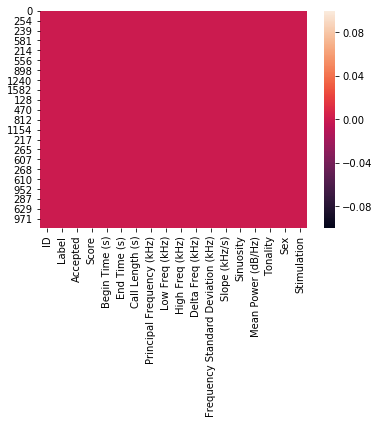

In [13]:
## Sanity check

print(len(male_all))
print(len(female_all))
print(len(total_calls_full))

sns.heatmap(total_calls_full.isnull())  # this is a good way to visually check for null values

## At this point, the full dataframe has been created and can be exported.

In [14]:
## Drop unnecessary columns (can also filter needed columns from beginning)

#total_calls = total_calls_full.drop(columns=['Label', 'Accepted', 'Score', 'Begin Time (s)', 'End Time (s)',
                                       # 'Principal Frequency (kHz)', 'Frequency Standard Deviation (kHz)',
                                      #  'Slope (kHz/s)', 'Sinuosity', 'Tonality'])

In [15]:
## Create a 'first_bout' dataframe where call 'Begin Time (s)' are all between 5 and 10 seconds

first_bout = total_calls_full[(total_calls_full['Begin Time (s)'] >= 5) & (total_calls_full['End Time (s)'] <= 10)]
#first_bout = first_bout.drop(columns=['Label', 'Accepted', 'Score', 'Begin Time (s)', 'End Time (s)',
                                      #  'Principal Frequency (kHz)', 'Frequency Standard Deviation (kHz)',
                                      #  'Slope (kHz/s)', 'Sinuosity', 'Tonality'])

In [16]:
## Create a 'second_bout' dataframe where call 'Begin Time (s)' are all after 10 seconds

sec_bout = total_calls_full[(total_calls_full['Begin Time (s)'] > 10 )]
#sec_bout = sec_bout.drop(columns=['Label', 'Accepted', 'Score', 'Begin Time (s)', 'End Time (s)',
                                      #  'Principal Frequency (kHz)', 'Frequency Standard Deviation (kHz)',
                                      #  'Slope (kHz/s)', 'Sinuosity', 'Tonality'])

In [17]:
## Comment this depending on what you want to plot

#total_calls = first_bout
#total_calls = sec_bout

In [18]:
total_calls_full.head()

,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Sex,Stimulation
0,1.0,USV,1.0,0.548342,28.025404,28.071404,0.046000,89.188849,83.057687,93.363607,10.305919,3.150801,52.311493,2.081640,-96.681192,0.184402,male,1
1,2.0,USV,1.0,0.589640,28.706204,28.752604,0.046400,89.713191,80.414176,100.426876,20.012701,5.043053,-195.647868,2.894629,-93.535514,0.183509,male,1
2,1.0,USV,1.0,0.793835,5.108587,5.158858,0.050271,58.680984,54.176346,60.462060,6.285714,1.945635,-75.057897,1.144653,-64.541213,0.533485,male,1
3,2.0,USV,1.0,0.617980,5.218687,5.267770,0.049083,56.467722,26.621034,63.194143,36.573109,10.059194,-475.355253,1.449613,-62.934910,0.557078,male,1
4,3.0,USV,1.0,0.708135,5.383426,5.392134,0.008708,55.334573,50.792829,61.887448,11.094620,3.676004,-1354.444064,1.040199,-67.372978,0.536150,male,1


In [19]:
first_bout.head()

,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Sex,Stimulation
2,1.0,USV,1.0,0.793835,5.108587,5.158858,0.050271,58.680984,54.176346,60.462060,6.285714,1.945635,-75.057897,1.144653,-64.541213,0.533485,male,1
3,2.0,USV,1.0,0.617980,5.218687,5.267770,0.049083,56.467722,26.621034,63.194143,36.573109,10.059194,-475.355253,1.449613,-62.934910,0.557078,male,1
4,3.0,USV,1.0,0.708135,5.383426,5.392134,0.008708,55.334573,50.792829,61.887448,11.094620,3.676004,-1354.444064,1.040199,-67.372978,0.536150,male,1
5,4.0,USV,1.0,0.706013,5.519613,5.532675,0.013063,59.656939,53.052115,61.905547,8.853432,3.030668,-728.127901,1.332582,-66.922433,0.523251,male,1
6,5.0,USV,1.0,0.686576,5.654052,5.660385,0.006333,55.518645,52.654081,59.741280,7.087199,2.571914,-1197.677157,1.525645,-69.047715,0.510037,male,1


In [20]:
sec_bout.head()

,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Sex,Stimulation
0,1.0,USV,1.0,0.548342,28.025404,28.071404,0.046000,89.188849,83.057687,93.363607,10.305919,3.150801,52.311493,2.081640,-96.681192,0.184402,male,1
1,2.0,USV,1.0,0.589640,28.706204,28.752604,0.046400,89.713191,80.414176,100.426876,20.012701,5.043053,-195.647868,2.894629,-93.535514,0.183509,male,1
27,26.0,USV,1.0,0.928154,10.122796,10.255796,0.133000,54.863249,22.417980,79.293675,56.875696,16.778436,64.578762,3.859140,-67.177377,0.635880,male,1
28,27.0,USV,1.0,0.749773,10.351283,10.456179,0.104896,47.657326,39.115582,76.236175,37.120594,9.598700,-37.792645,2.377332,-56.889786,0.716249,male,1
29,28.0,USV,1.0,0.995608,10.648376,10.745355,0.096979,68.973957,51.133512,76.469319,25.335807,7.965347,-213.220248,1.328776,-60.774158,0.719211,male,1


## The calls should all be organized together in a dataframe now.  <br/> The next step is to filter and create variables to store the values for plotting.

### Male variable assignment

In [21]:
#call_len_mList = get_list('male', 'Call Length (s)')
#low_freq_mList = get_list('male', 'Low Freq (kHz)')
#high_freq_mList = get_list('male', 'High Freq (kHz)')
#del_freq_mList = get_list('male', 'Delta Freq (kHz)')
#avg_pow_mList = get_list('male', 'Mean Power (dB/Hz)')

### Female variable assignment

In [22]:
#call_len_fList = get_list('female', 'Call Length (s)')
#low_freq_fList = get_list('female', 'Low Freq (kHz)')
#high_freq_fList = get_list('female', 'High Freq (kHz)')
#del_freq_fList = get_list('female', 'Delta Freq (kHz)')
#avg_pow_fList = get_list('female', 'Mean Power (dB/Hz)')

### Plot the data

In [23]:
## Call the plot_list fn five times with a male list, female list
## and the string of the attribute being plotted

#plot_list(call_len_mList, call_len_fList, 'Call Length (s)')
#plot_list(low_freq_mList, low_freq_fList, 'Low Freq (kHz)')
#plot_list(high_freq_mList, high_freq_fList, 'High Freq (kHz)')
#plot_list(del_freq_mList, del_freq_fList, 'Delta Freq (kHz)')
#plot_list(avg_pow_mList, avg_pow_fList, 'Mean Power (dB\Hz)')

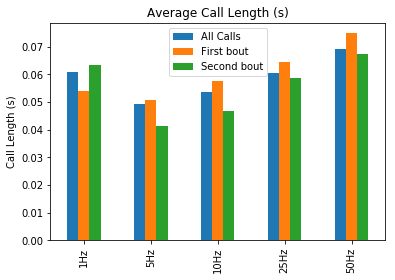

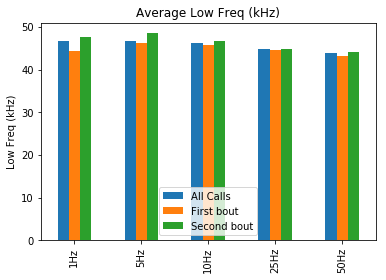

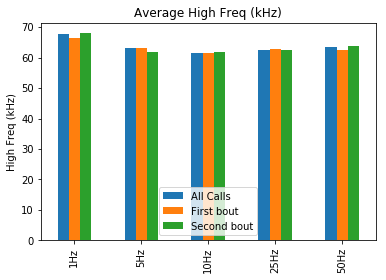

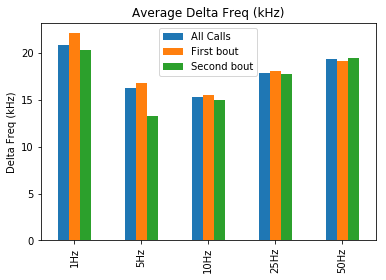

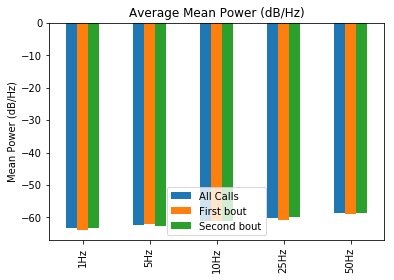

In [24]:
plot_feature('Call Length (s)')
plot_feature('Low Freq (kHz)')
plot_feature('High Freq (kHz)')
plot_feature('Delta Freq (kHz)')
plot_feature('Mean Power (dB/Hz)')

In [25]:
print(os.getcwd())

/Users/zacharygutierrez/Dropbox (Scripps Research)/Detections/Female/50Hz


In [26]:
## Export the final dataframe as a spreadsheet

os.chdir('/Users/zacharygutierrez/Desktop')

total_calls_full.to_excel("total_calls_full.xlsx")
#total_calls.to_excel("total_calls.xlsx") 
#first_bout.to_excel("first_bout.xlsx") 
#sec_bout.to_excel("sec_bout.xlsx")

# End